<a href="https://colab.research.google.com/github/KeerthiKamarthi/html_file/blob/main/Creating%20Mask%20From%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycocotools.coco import COCO
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline

In [ ]:
coco = COCO('/content/trainval.json')
img_dir = '/content/images'
image_id = 0

img = coco.imgs[image_id]
# loading annotations into memory...
   # Done(t = 12.70 s)
# creating index...
   # index created!

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


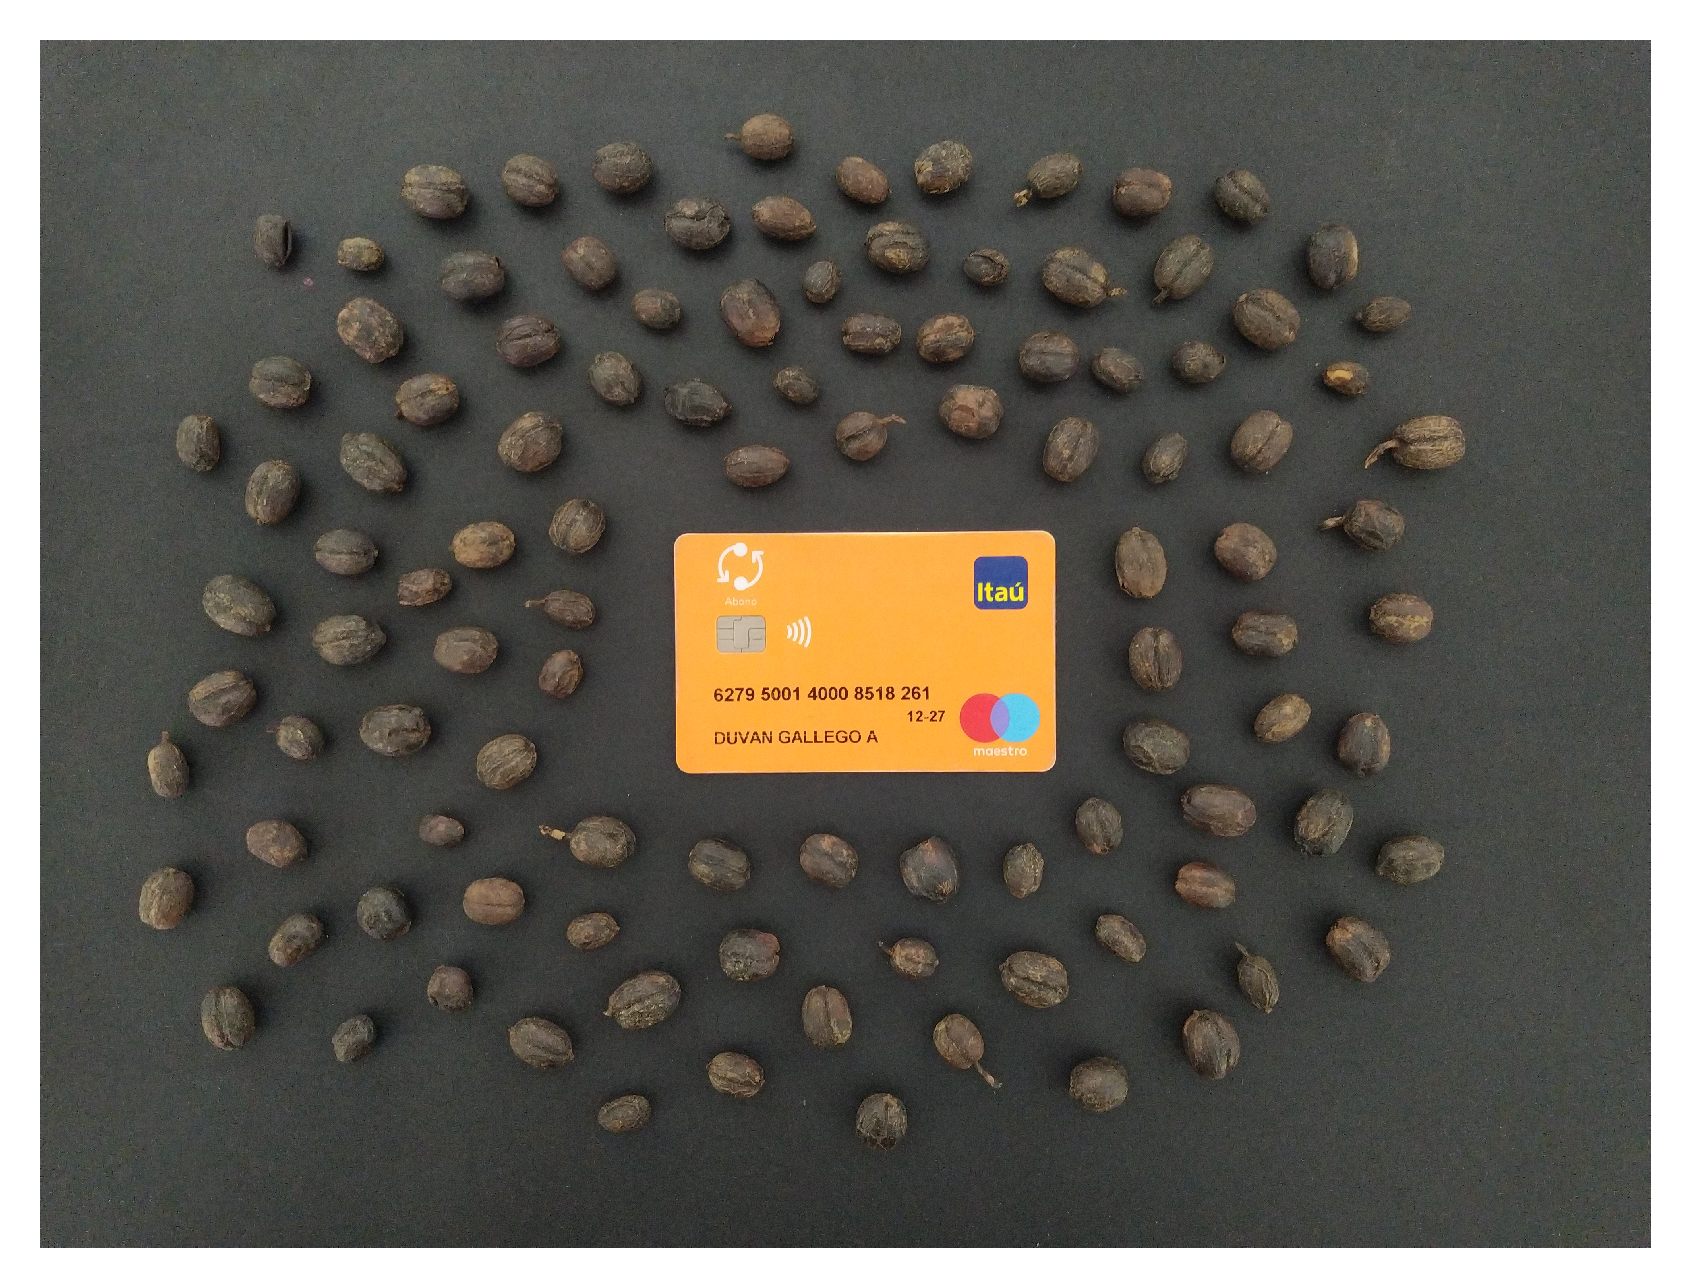

In [ ]:
image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 300
plt.axis('off')
plt.imshow(image, interpolation = 'nearest', aspect=1)
plt.show()

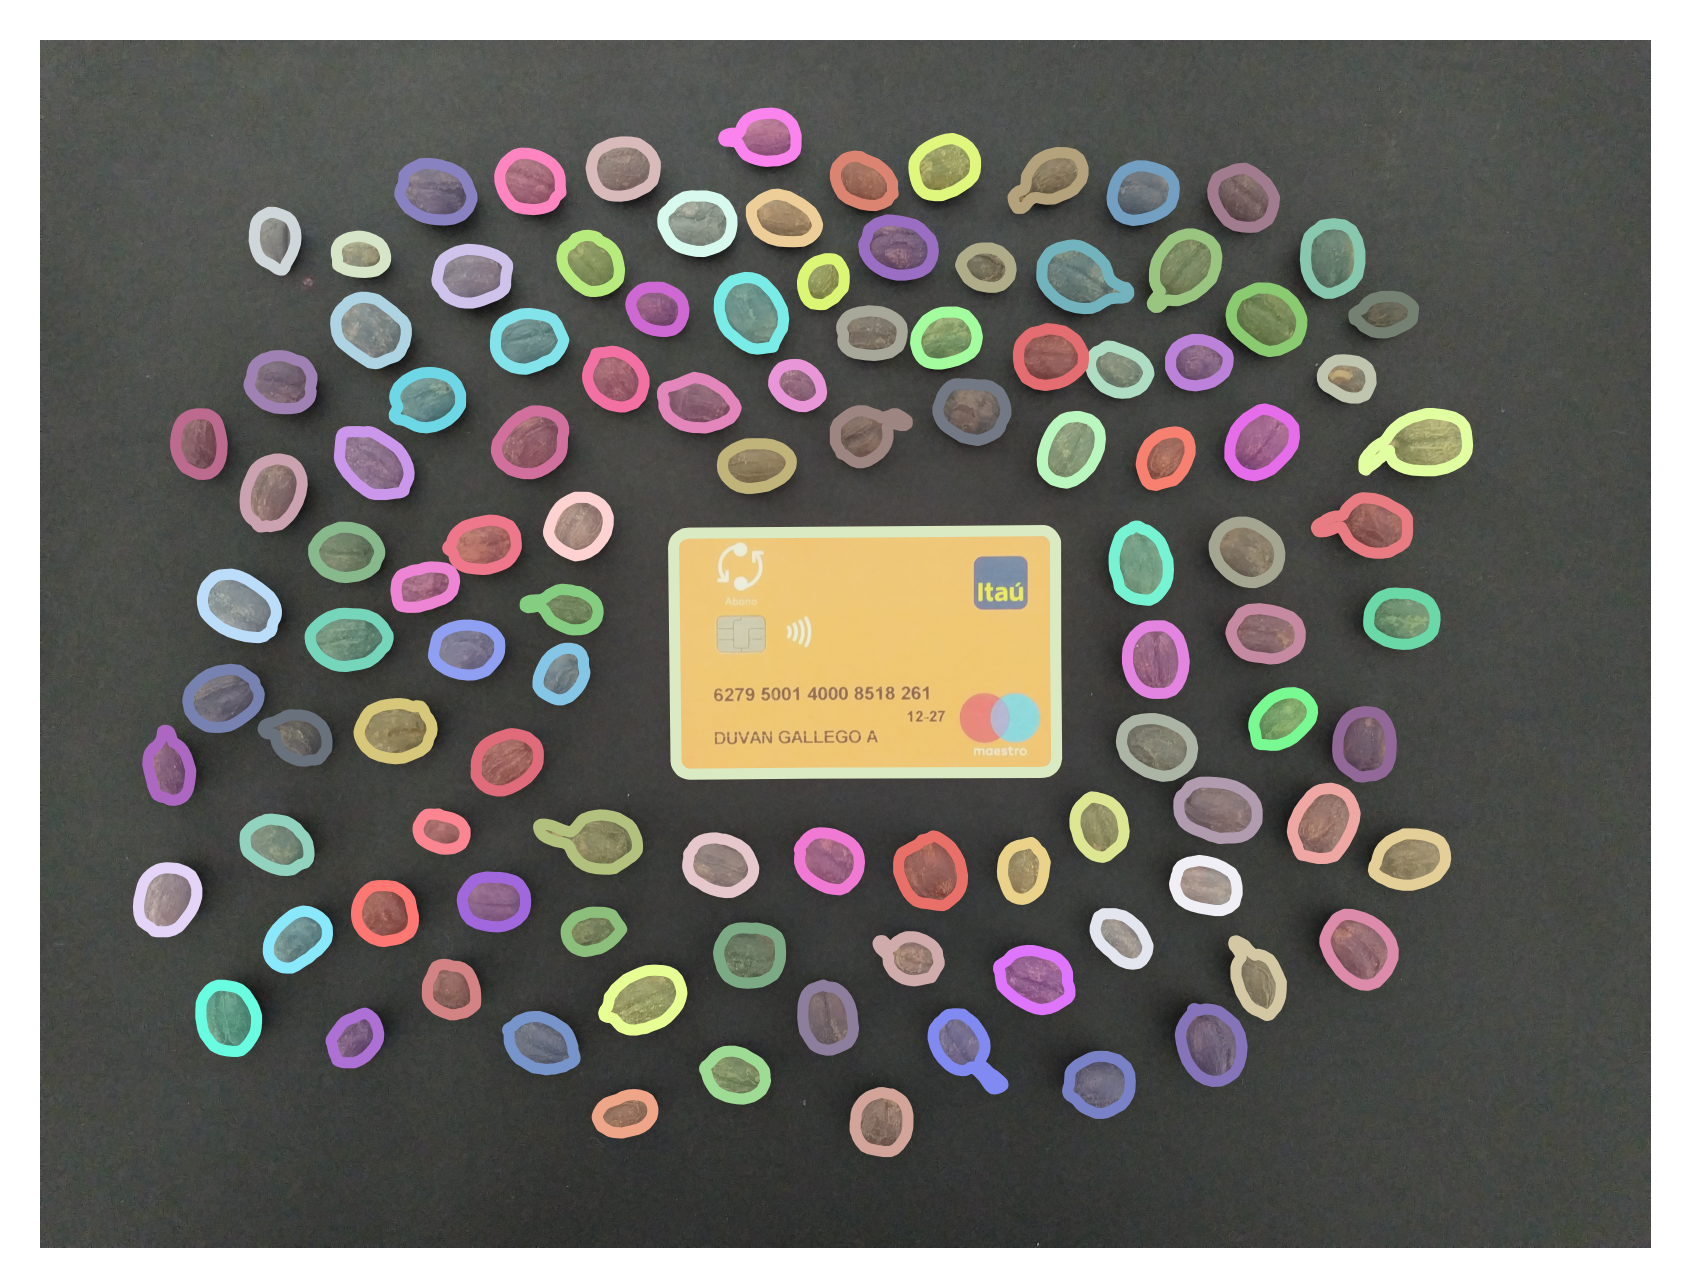

In [ ]:
plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds = img['id'], catIds = cat_ids, iscrowd = None)
anns = coco.loadAnns(anns_ids)
plt.axis('off')
coco.showAnns(anns)

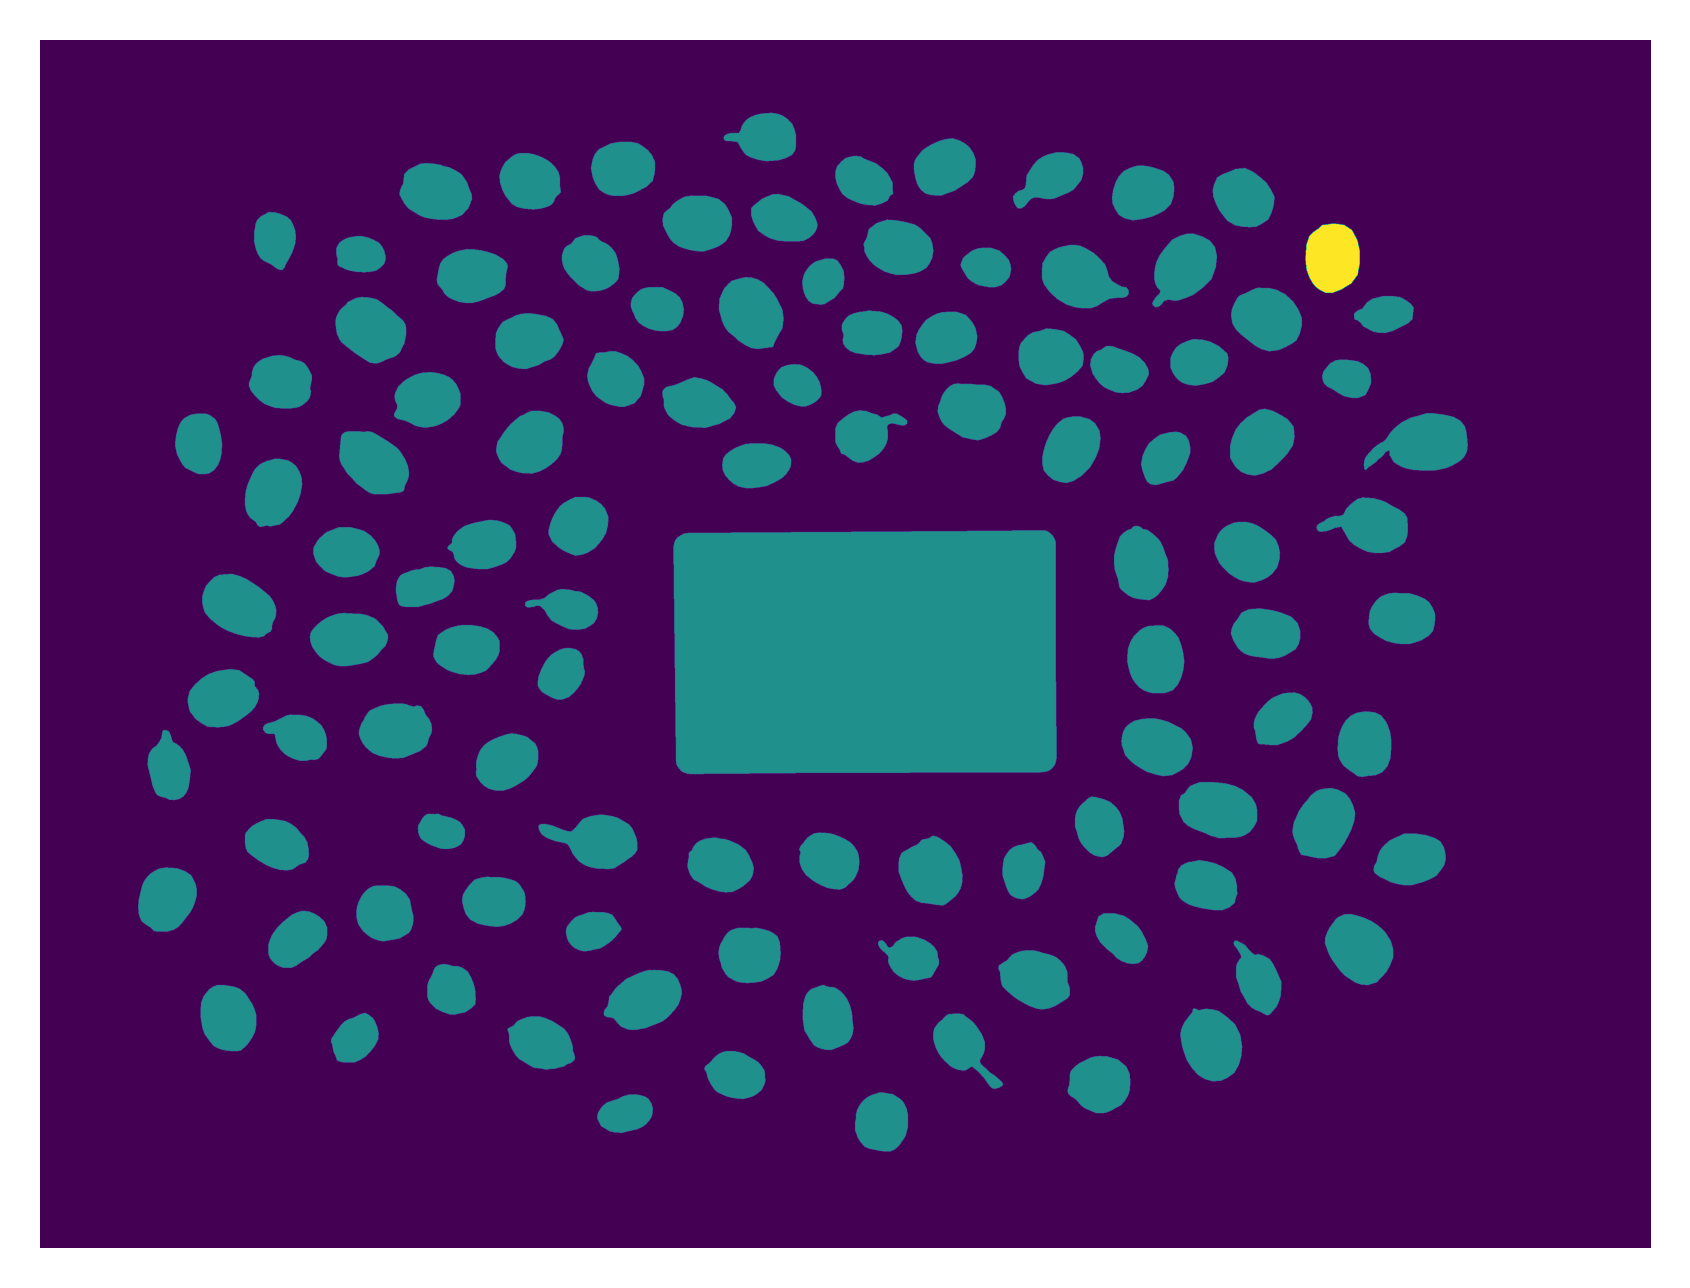

In [ ]:
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
   mask += coco.annToMask(anns[i])
plt.axis('off')
plt.imshow(mask)

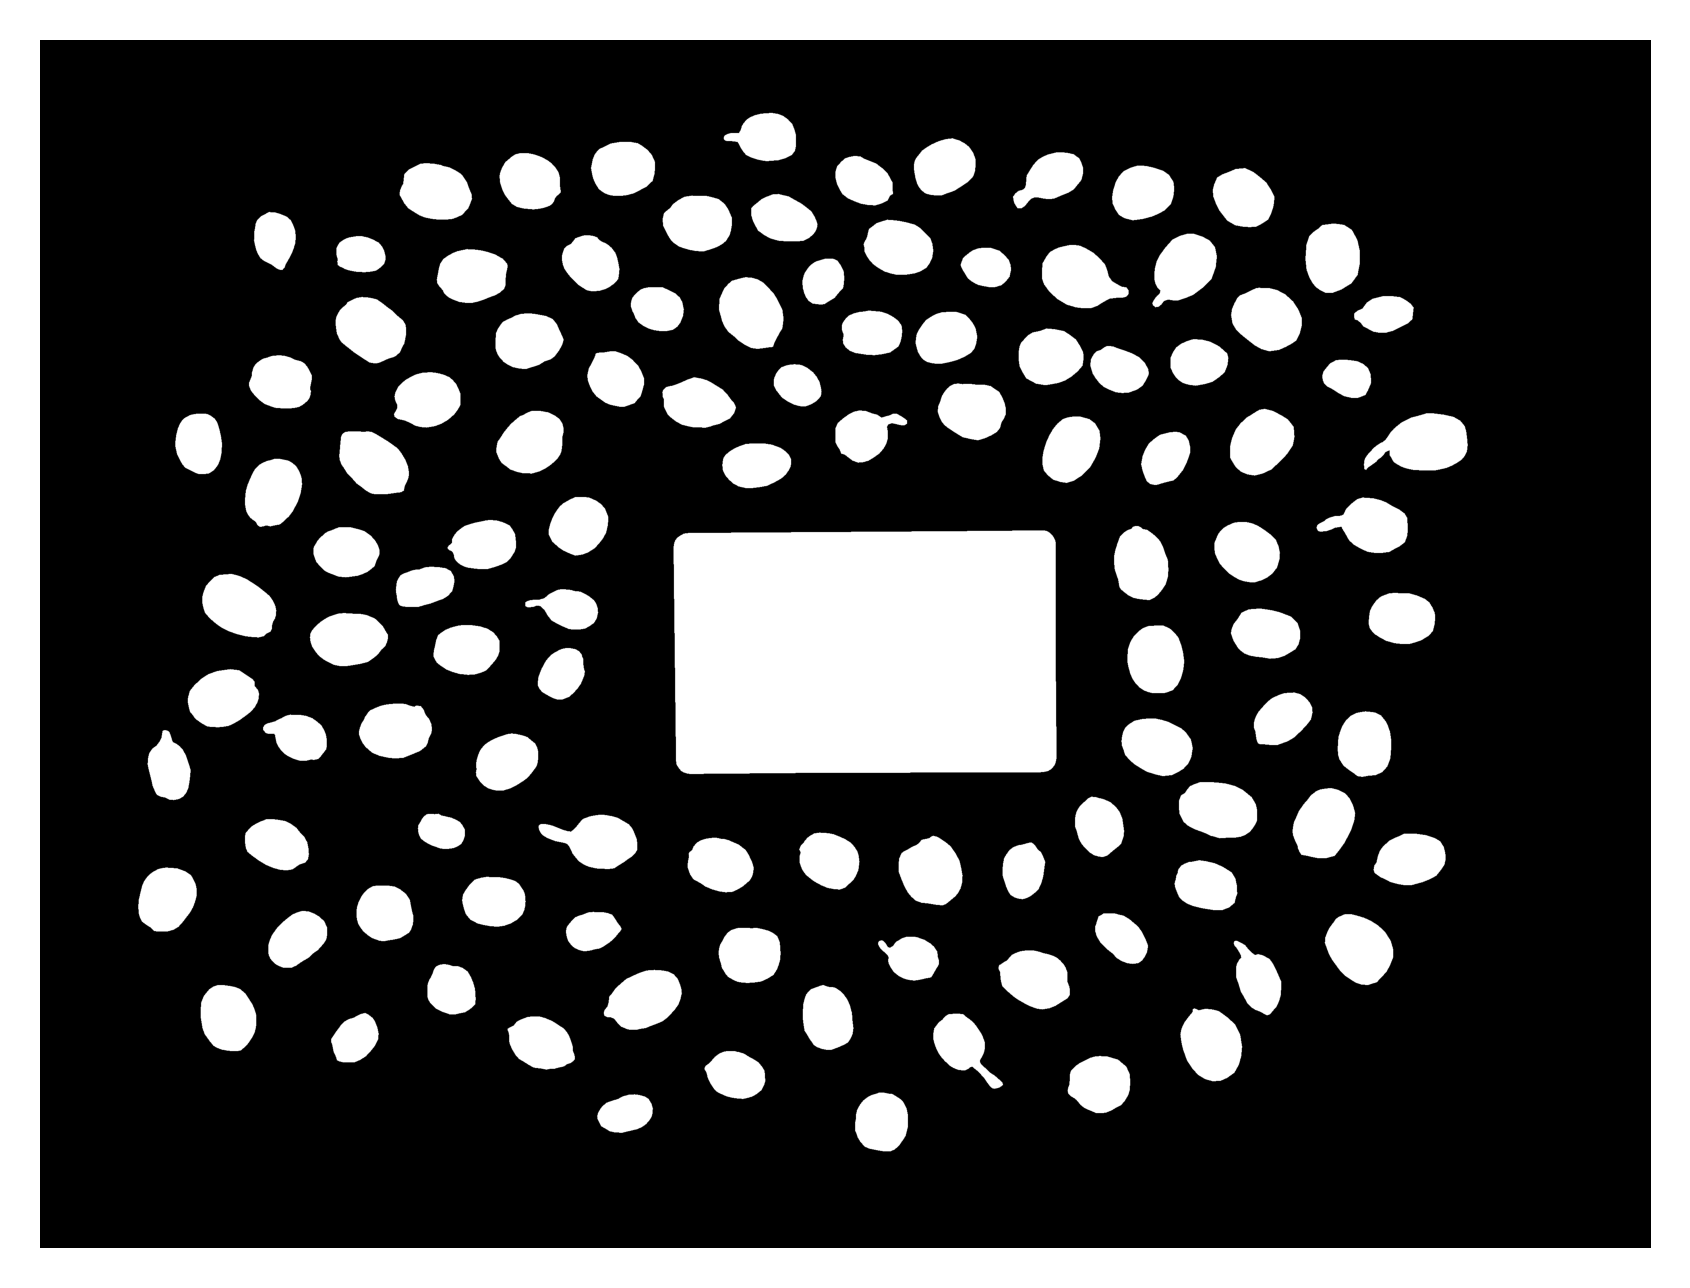

In [ ]:
#Construct the binary mask
mask = coco.annToMask(anns[0]) > 0
for i in range(len(anns)):
   mask += coco.annToMask(anns[i]) > 0
plt.axis('off')
plt.imshow(mask, cmap = 'gray')